# **Testing of the sampling algorithms**

In this jupyter notebook we will be testing and showcasing our library SamplingLIB. It includes sampling algorithms along with some helper functions for visualization and benchmarking.

Sampling algorithms:
1. Random Walk Metropolis Hastings (MH)
2. Adaptive Metropolis (AM)
3. Delayed Rejection Adaptive Metropolis (DRAM)
4. DiffeRential Evolution Adaptive Metropolis (DREAM)

**We load classes from SamplingLIB and other requiered libraries**

In [3]:
from SamplingLIB import Sampling, MH, AM, DRAM, DREAM
import numpy as np
import matplotlib.pyplot as plt

## **Testing data**

We create a few distribution function to demonstrate our methods on.

### **Donut distribution (dim=2)**

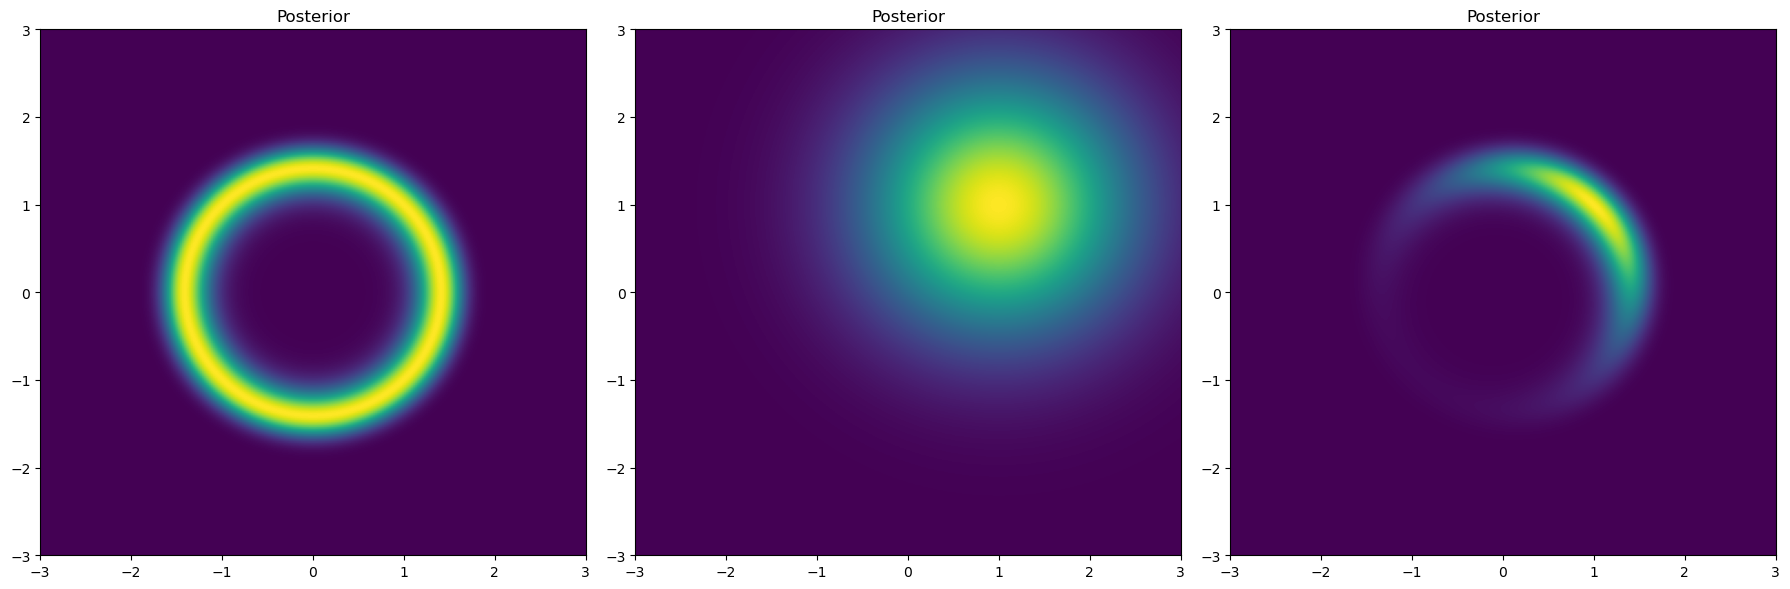

In [4]:
# Parameters
donut_dim = 2
log = True

# Likelihood
donut_y = 2.0  # observation
donut_noise = 0.5  # noise standard deviation
def donut_forward(u):
    return (u[0]**2+u[1]**2)

# Prior
prior_means = [[1.0, 1.0]]
prior_stds = [[1.0, 1.0]]

donut = Sampling(dimension=donut_dim, forward_model=donut_forward, observed_data=donut_y, noise_std=donut_noise, prior_means=prior_means, prior_stds=prior_stds, log=log)
donut.visualize(max_points=300, ranges=[(-3, 3), (-3, 3)], visuals=[donut.likelihood, donut.prior, donut.posterior])

### **Rosenbrock (Banana) distribution (dim=2)**

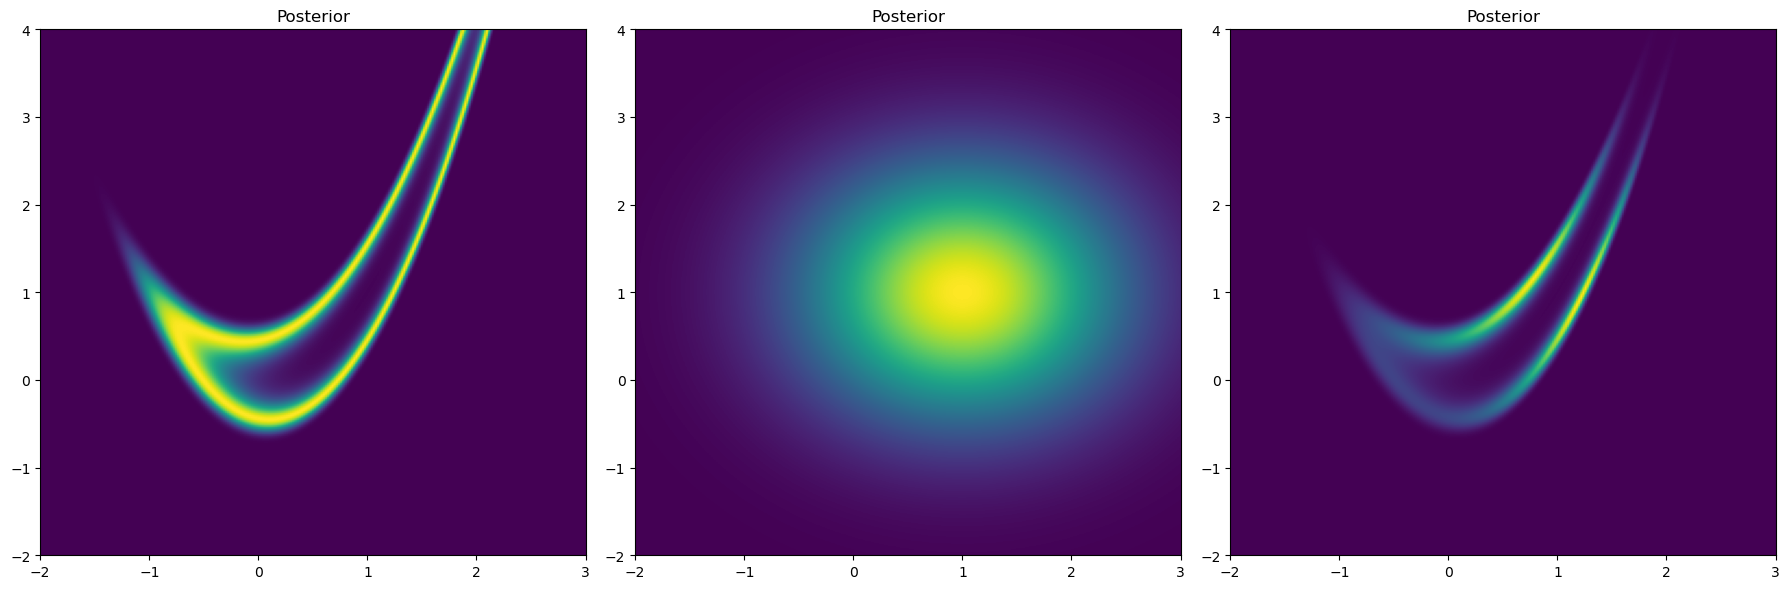

In [5]:
# Parameters
banana_dim = 2
log = True

# Likelihood
banana_y = 3.0  # observation
banana_noise = 1.0  # noise standard
def banana_forward(u):
    a = 1.0
    b = 10.0
    return (a-u[0])**2 + b*(u[1]-(u[0])**2)**2

# Prior
prior_means = [[1.0, 1.0]]
prior_stds = [[1.0, 1.0]]

banana = Sampling(dimension=banana_dim, forward_model=banana_forward, observed_data=banana_y, noise_std=banana_noise, prior_means=prior_means, prior_stds=prior_stds, log=log)
banana.visualize(max_points=300, ranges=[(-2, 3), (-2, 4)], visuals=[banana.likelihood, banana.prior, banana.posterior])

### **Wave distribution (dim=2)**

In [6]:
# def hard_G(u):  # forward model
#    return np.sin(np.cos(np.tan(u[0]))) * np.sin(np.cos(np.tan(u[1])))

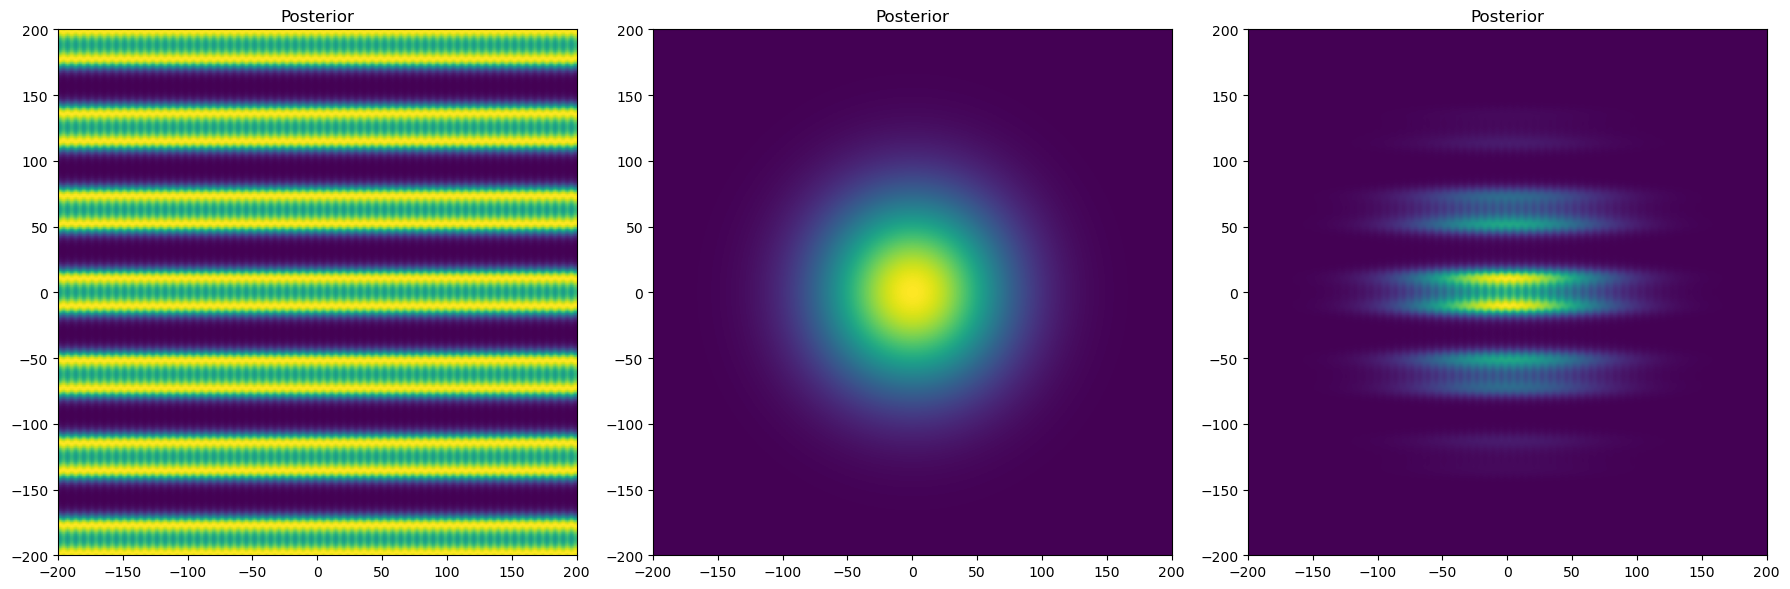

In [7]:
# Parameters
wave_dim = 2
log = True

# Likelihood
wave_y = 1.0  # observation
wave_gamma = 1.0  # noise standard deviation
def wave_forward(u):
    a = 0.1
    b = 2.0
    c = 1.0
    d = 0.1
    return (a * np.sin(c * u[0])) + (b * np.cos(d * u[1]))

# Prior
prior_means = [[0.0, 0.0]]
prior_stds = [[50.0, 50.0]]

wave = Sampling(dimension=wave_dim, forward_model=wave_forward, observed_data=wave_y, noise_std=wave_gamma, prior_means=prior_means, prior_stds=prior_stds, log=log)
wave.visualize(max_points=300, ranges=[(-200, 200), (-200, 200)], visuals=[wave.likelihood, wave.prior, wave.posterior])

## **Basic Metropolis-Hastings**

In this section we will test and visualize the results of MH algorithm.

### **Donut distribution (dim=2)**

**Parametrs for testing**

In [8]:
initial_cov = None
scale_factor = None
burnin = 0.2

donut_MH = MH(distribution=donut, initial_cov=initial_cov, scale_factor=scale_factor, burnin=burnin)

**Sampling**

In [9]:
initial = None
N = 100000

donut_MH.sample(initial=initial, N=N)

**Visualization of obtained samples**

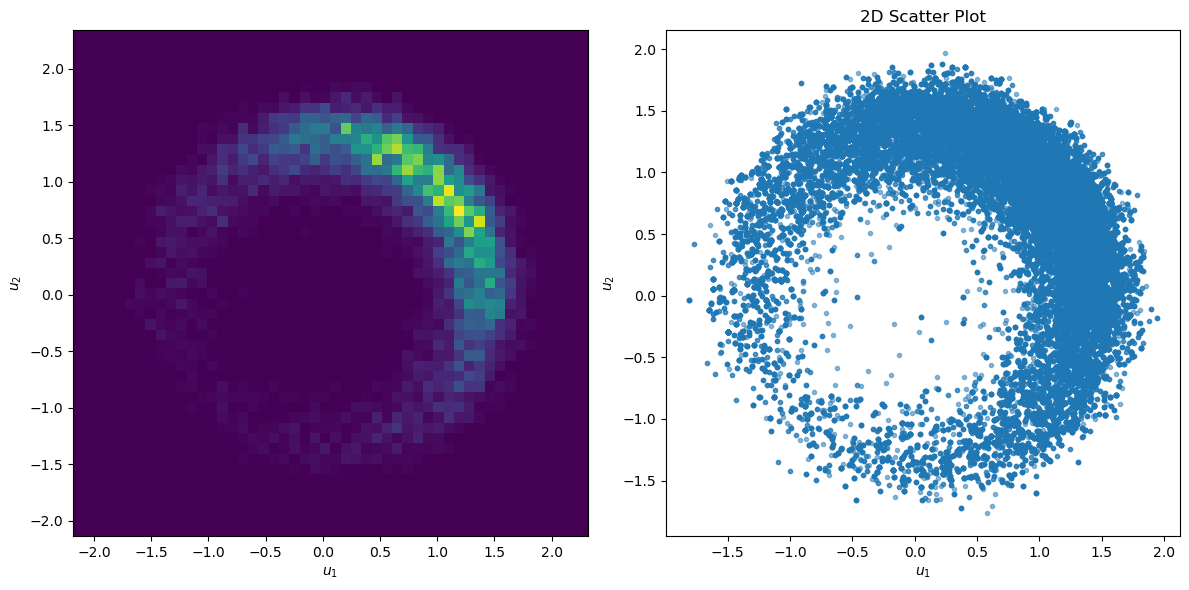

In [10]:
donut_MH.visualize([donut_MH.samples])

**Quality of sampling method**

g:\ProgramFiles\VS_Code\Projects\BC\Codes\SamplingLIB.py:305: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


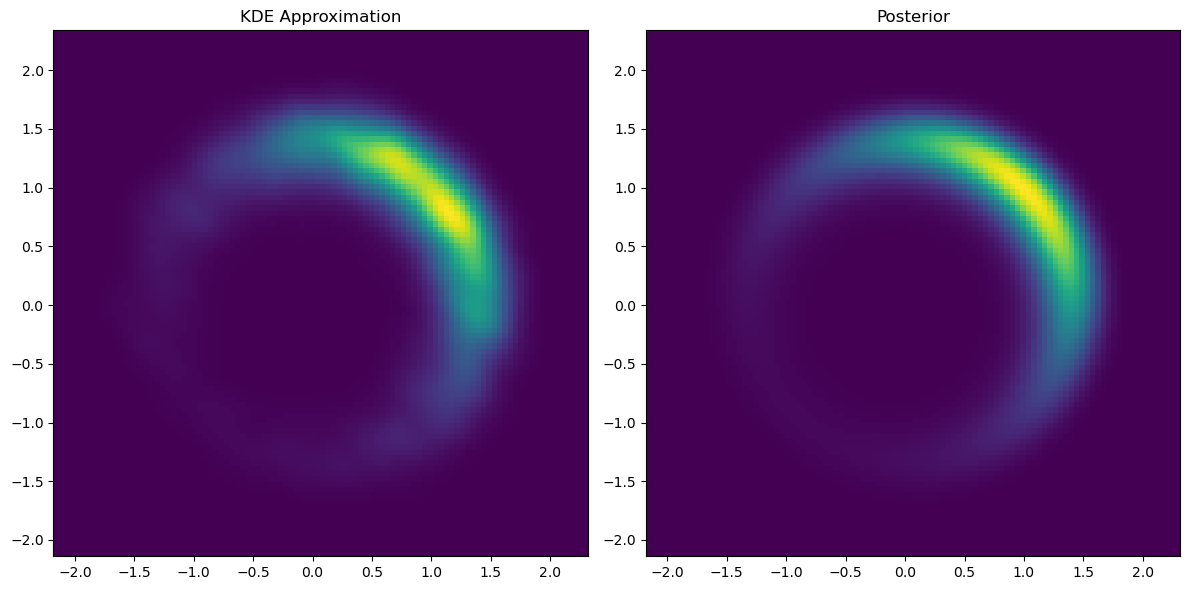

KL: 0.023440346307703676


In [11]:
print("KL:", donut_MH.sampling_quality(donut_MH.samples, visualise=True))

**Eficiency of the sampling method**

In [12]:
print(f"Acceptance rate: {(donut_MH.acc_rate * 100):.2f}%")

Acceptance rate: 10.47%


### **Banana distribution (dim=2)**

**Parametrs for testing**

In [13]:
initial_cov = None
scale_factor = None
burnin = 0.2

banana_MH = MH(distribution=banana, initial_cov=initial_cov, scale_factor=scale_factor, burnin=burnin)

**Sampling**

In [14]:
initial = None
N = 100000

banana_MH.sample(initial=initial, N=N)

**Visualization of obtained samples**

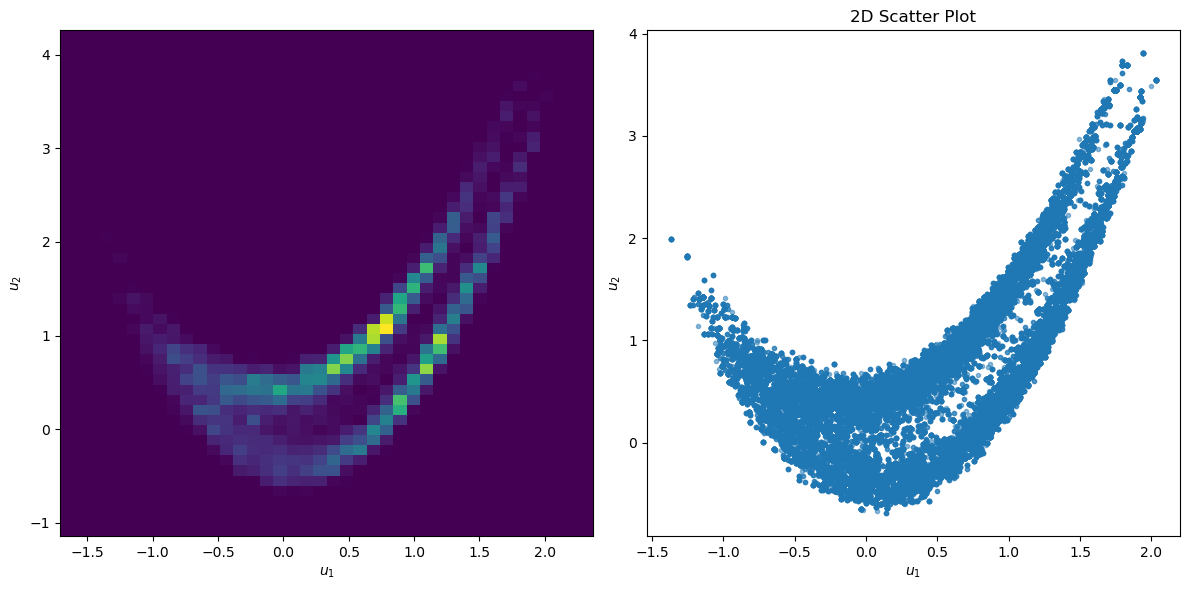

In [15]:
banana_MH.visualize(visuals=[banana_MH.samples])

**Quality of sampling method**

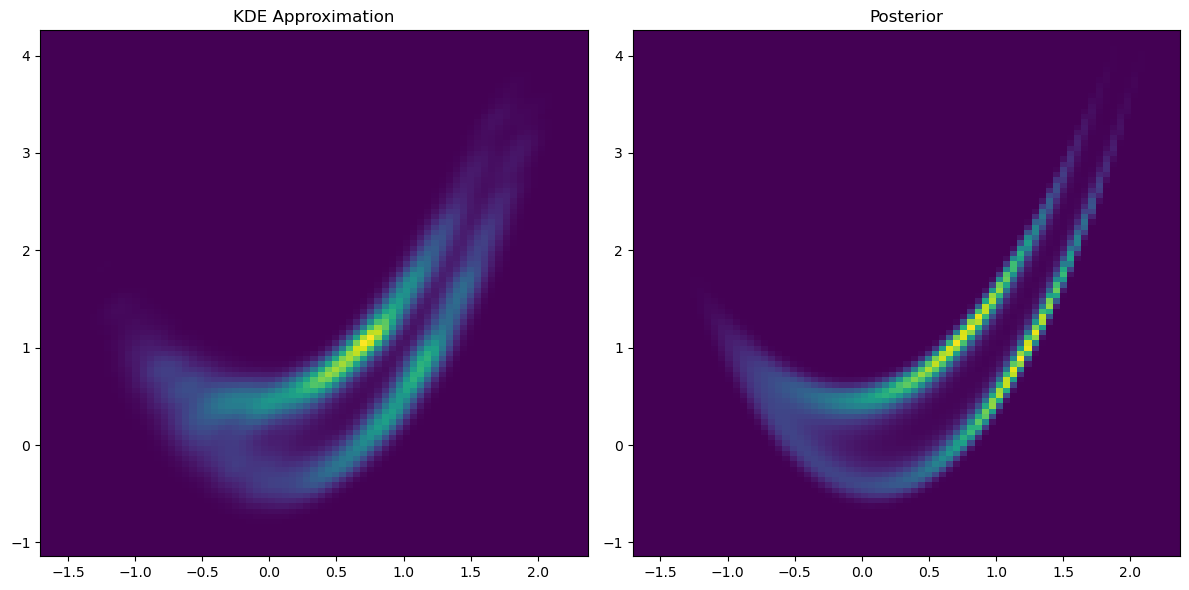

KL: 0.205187547463898


In [16]:
print("KL:", banana_MH.sampling_quality(banana_MH.samples, visualise=True))

**Eficiency of the sampling method**

In [17]:
print(f"Acceptance rate: {(banana_MH.acc_rate * 100):.2f}%")

Acceptance rate: 6.92%


## **Adaptive Metropolis**

### **Banana distribution (dim=2)**

**Parametrs for testing**

In [18]:
initial_cov = None
scale_factor = None
burnin = 0.2
eps = 1e-5
update_step = 1

banana_AM = AM(distribution=banana, initial_cov=initial_cov, scale_factor=scale_factor, burnin=burnin, eps=eps, update_step=update_step)

**Sampling**

In [19]:
initial = None
N = 100000

banana_AM.sample(initial=initial, N=N)

**Visualization of obtained samples**

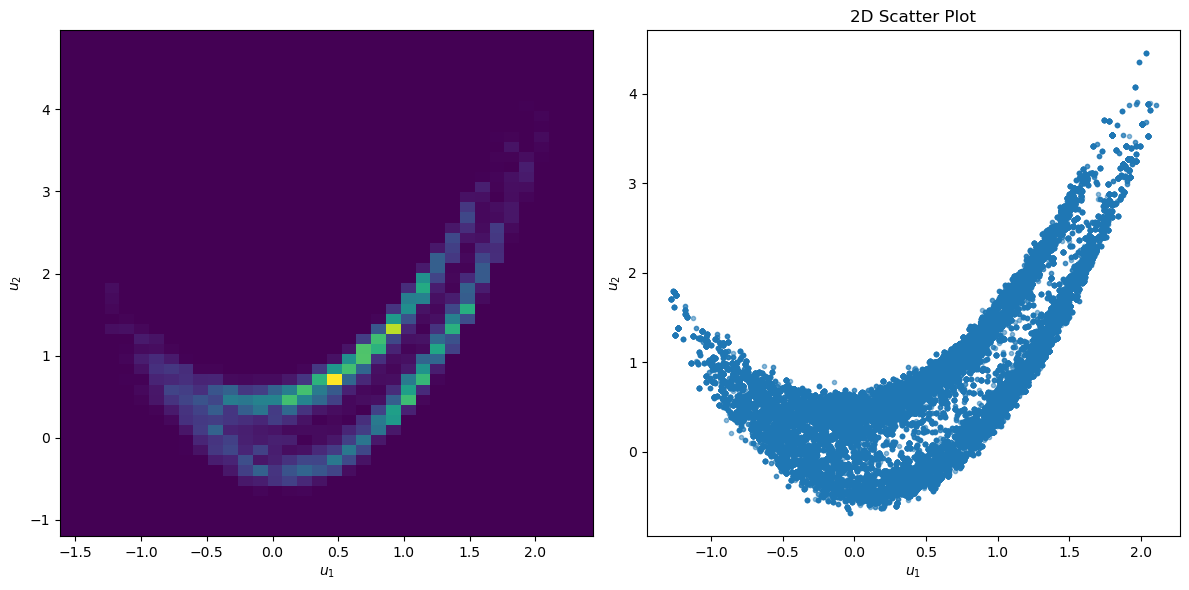

In [20]:
banana_AM.visualize(visuals=[banana_AM.samples])

**Quality of sampling method**

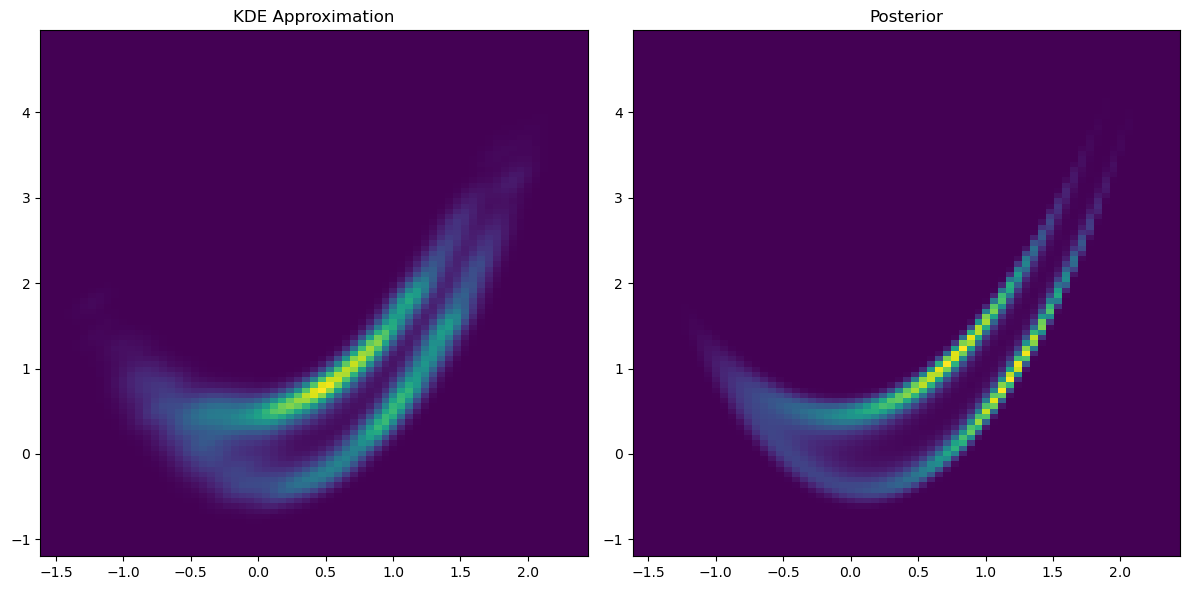

KL: 0.20253648295406784


In [21]:
print("KL:", banana_AM.sampling_quality(banana_AM.samples, visualise=True))

**Efficienty of the sampling method**

In [22]:
print(f"Acceptance rate: {(banana_AM.acc_rate * 100):.2f}%")

Acceptance rate: 5.94%


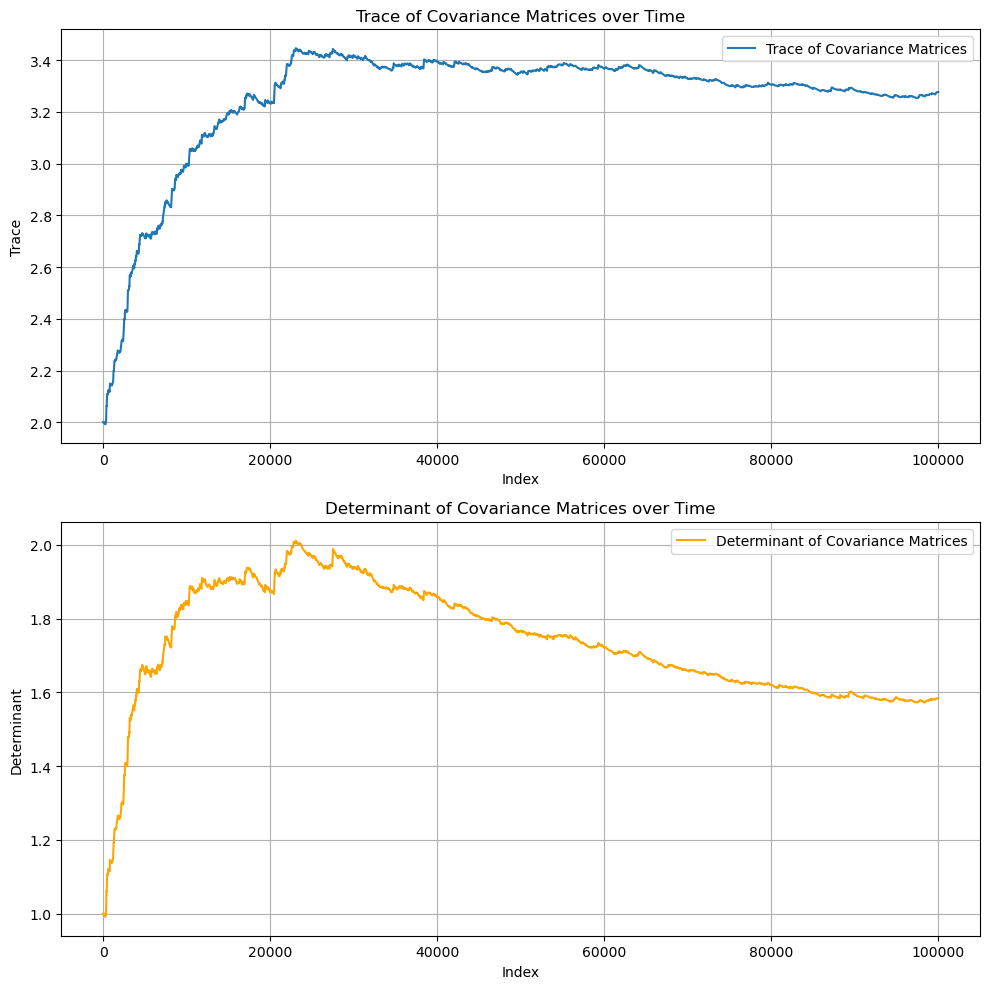

In [23]:
# Compute the trace of each covariance matrix
traces = [np.trace(matrix) for matrix in banana_AM.C]

# Compute the determinant of each covariance matrix (optional)
determinants = [np.linalg.det(matrix) for matrix in banana_AM.C]

# Create a figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot the trace of each covariance matrix
axs[0].plot(traces, label='Trace of Covariance Matrices')
axs[0].set_title('Trace of Covariance Matrices over Time')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Trace')
axs[0].legend()
axs[0].grid(True)

# Plot the determinant of each covariance matrix
axs[1].plot(determinants, label='Determinant of Covariance Matrices', color='orange')
axs[1].set_title('Determinant of Covariance Matrices over Time')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Determinant')
axs[1].legend()
axs[1].grid(True)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## **DRAM**

### **Banana distribution (dim=2)**

**Parametrs for testing**

In [24]:
initial_cov = None
scale_factor = None
burnin = 0.2
eps = 1e-5
update_step = 1
gammas = None
num_stages = 3

banana_DRAM = DRAM(distribution=banana, initial_cov=initial_cov, scale_factor=scale_factor, burnin=burnin, eps=eps, update_step=update_step, gammas=gammas, num_stages=num_stages)

**Sampling**

In [25]:
initial = None
N = 100000

banana_DRAM.sample(initial=initial, N=N)

g:\ProgramFiles\VS_Code\Projects\BC\Codes\SamplingLIB.py:1127: RuntimeWarning: divide by zero encountered in log1p
  numerator += np.log1p(-np.exp(self._acceptance_probability(stage_posterior[i:][::-1])))
g:\ProgramFiles\VS_Code\Projects\BC\Codes\SamplingLIB.py:1128: RuntimeWarning: divide by zero encountered in log1p
  denominator += np.log1p(-np.exp(self._acceptance_probability(stage_posterior[:len(stage_posterior) - i])))


**Visualization of obtained samples**

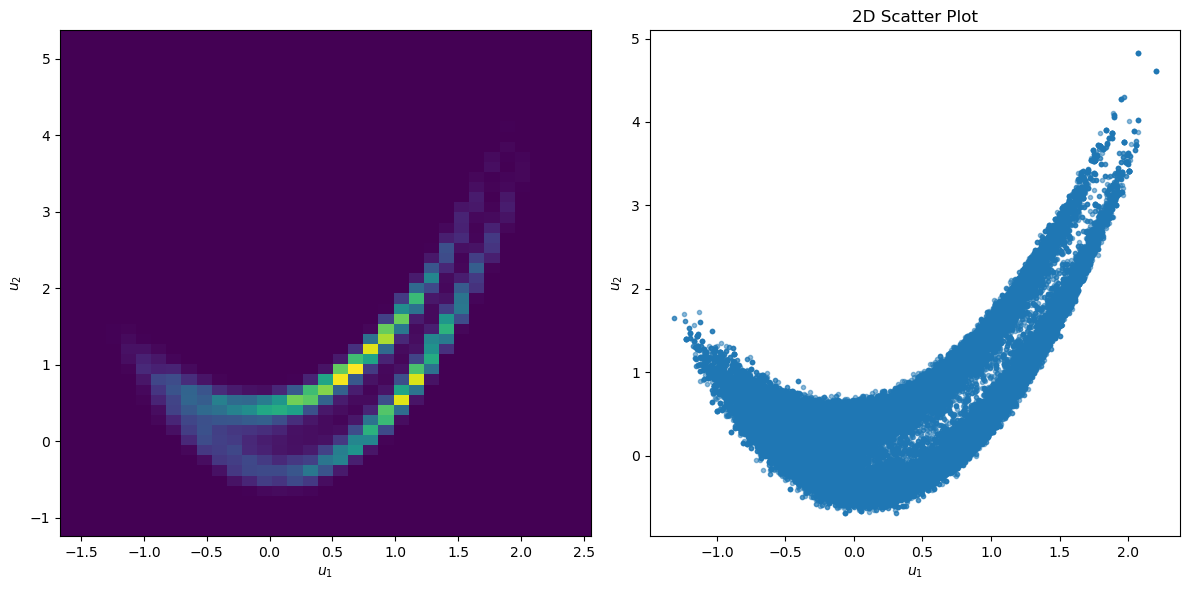

In [26]:
banana_DRAM.visualize([banana_DRAM.samples])

In [27]:
banana_DRAM.samples.ndim

2

**Quality of sampling method**

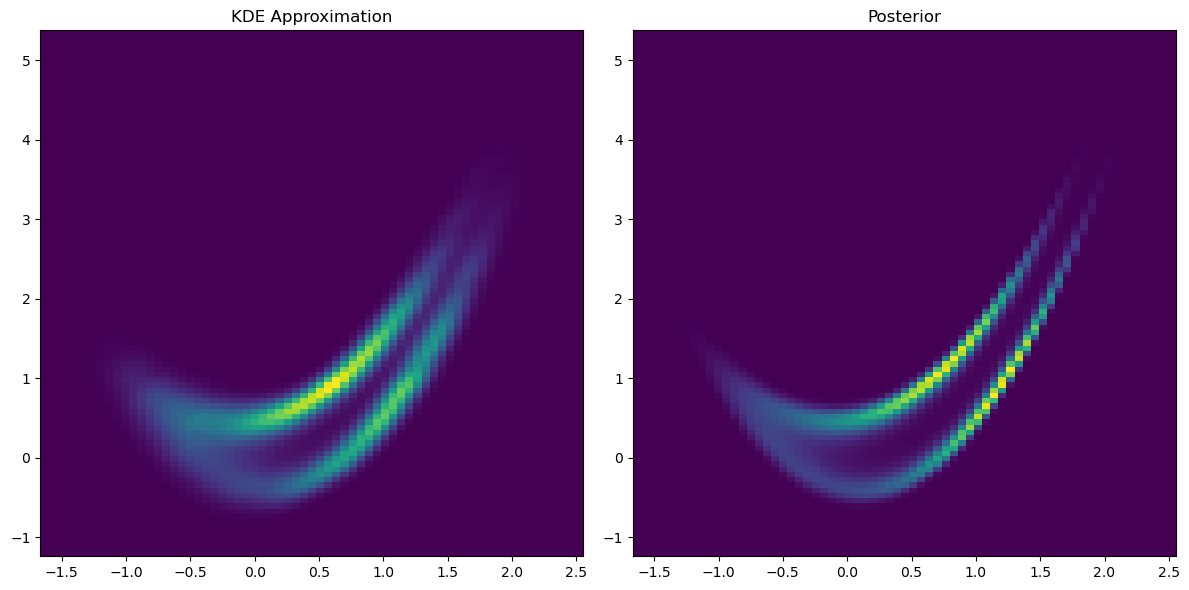

KL: 0.20066061631653223


In [28]:
print("KL:", banana_DRAM.sampling_quality(banana_DRAM.samples, visualise=True))

**Efficienty of the sampling method**

In [29]:
for i, acc_rate in enumerate(banana_DRAM.acc_rate):
    print(f"Acceptance rate for stage {i+1}: {(acc_rate * 100):.2f}%")
print(f"Acceptance rate: {(sum(banana_DRAM.acc[:,1])/len(banana_DRAM.samples)) * 100:.2f}%")

Acceptance rate for stage 1: 6.00%
Acceptance rate for stage 2: 9.43%
Acceptance rate for stage 3: 14.08%
Acceptance rate: 26.86%


## **DREAM**

### **Donut distribution (dim=2)**

**Parametrs**

In [30]:
chains = None
scale_factor = None
burnin = 0.2
nCR = 3
max_pairs = 3
eps = 1e-5
num_stages = 3
outlier_detection = True

donut_DREAM = DREAM(distribution=donut, chains=chains, scale_factor=scale_factor, burnin=burnin, nCR=nCR, max_pairs=max_pairs, eps=eps, num_stages=num_stages, outlier_detection=outlier_detection)

**Sampling**

In [31]:
initial = None
N = 100000

donut_DREAM.sample(initial=initial, N=N)

g:\ProgramFiles\VS_Code\Projects\BC\Codes\SamplingLIB.py:1319: RuntimeWarning: divide by zero encountered in log1p
  numerator += np.log1p(-np.exp(self._acceptance_probability(stage_posterior[i:][::-1])))
g:\ProgramFiles\VS_Code\Projects\BC\Codes\SamplingLIB.py:1320: RuntimeWarning: divide by zero encountered in log1p
  denominator += np.log1p(-np.exp(self._acceptance_probability(stage_posterior[:len(stage_posterior) - i])))


**Visualization of obtained samples**

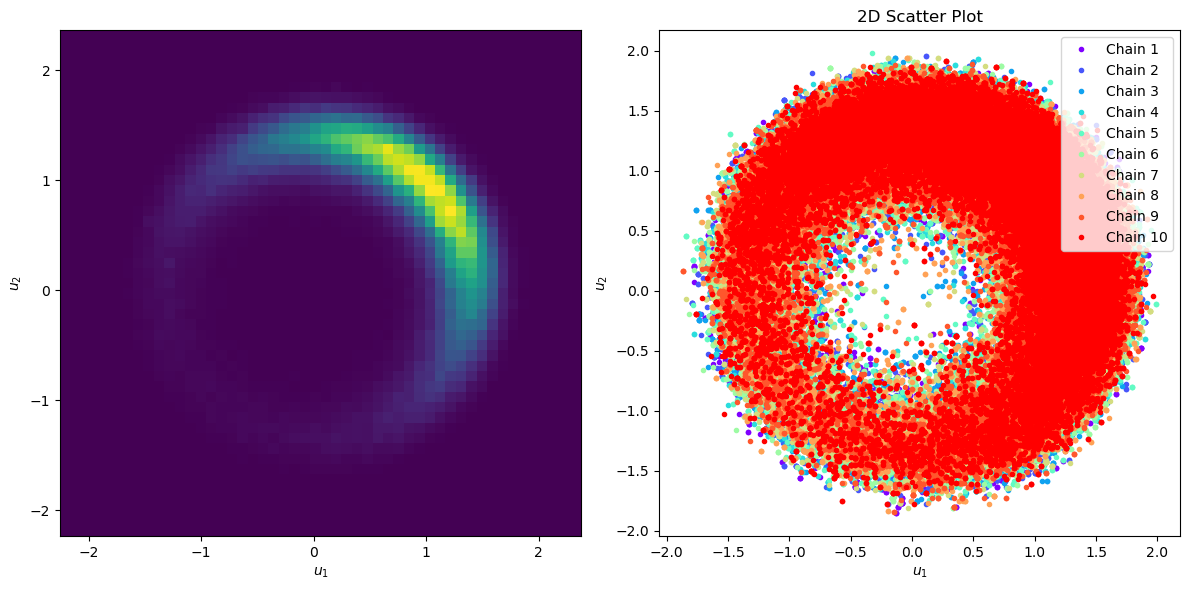

In [32]:
donut_DREAM.visualize(visuals=[donut_DREAM.samples])

**Quality of sampling method**

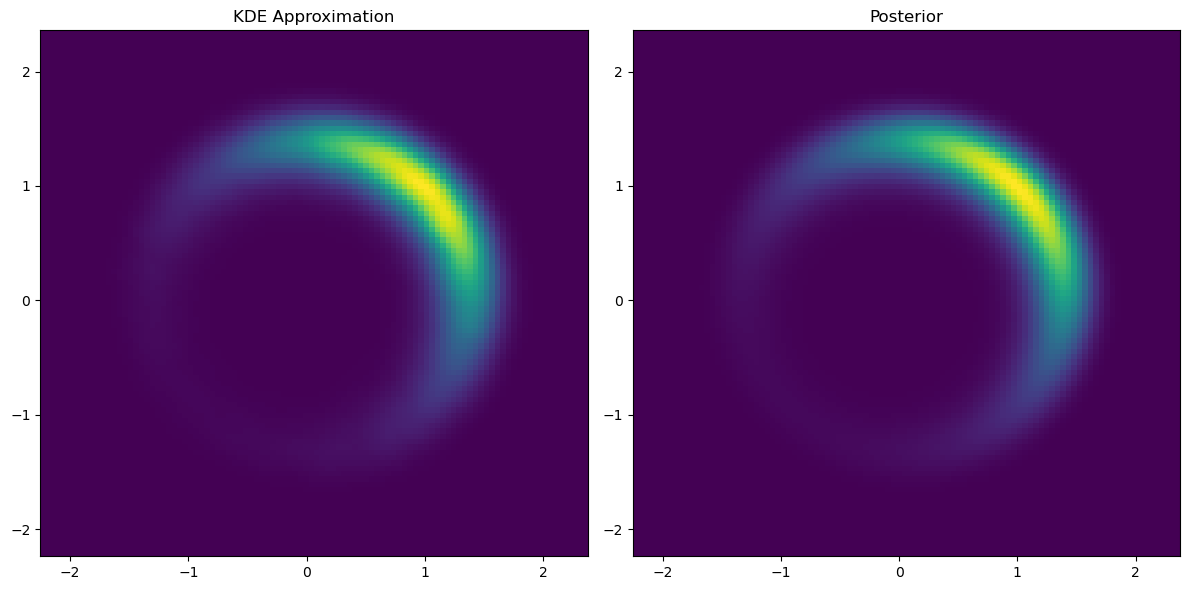

KL: 0.00463991212000366


In [33]:
print("KL:", donut_DREAM.sampling_quality(donut_DREAM.samples, visualise=True))

**Efficienty of the sampling method**

In [34]:
for chain in range(donut_DREAM.chains):
    for stage, acc_rate in enumerate(donut_DREAM.acc_rate[chain,:]):
        print(f"Acceptance rate for chain {chain+1}, stage {stage+1}: {(acc_rate * 100):.2f}%")
    print(f"Acceptance rate for chain {chain+1}: {((sum(donut_DREAM.acc[chain,:,1])/len(donut_DREAM.samples))*100):.2f}%")
    print("-----------------------------------------------------------------------------------------")
print(f"Acceptance rate: {((np.sum(donut_DREAM.acc[:,:,1])/(len(donut_DREAM.samples)*donut_DREAM.chains))*100):.2f}%")

Acceptance rate for chain 1, stage 1: 45.00%
Acceptance rate for chain 1, stage 2: 42.93%
Acceptance rate for chain 1, stage 3: 42.32%
Acceptance rate for chain 1: 81.89%
-----------------------------------------------------------------------------------------
Acceptance rate for chain 2, stage 1: 44.58%
Acceptance rate for chain 2, stage 2: 43.36%
Acceptance rate for chain 2, stage 3: 42.06%
Acceptance rate for chain 2: 81.81%
-----------------------------------------------------------------------------------------
Acceptance rate for chain 3, stage 1: 45.00%
Acceptance rate for chain 3, stage 2: 43.40%
Acceptance rate for chain 3, stage 3: 42.14%
Acceptance rate for chain 3: 81.99%
-----------------------------------------------------------------------------------------
Acceptance rate for chain 4, stage 1: 45.15%
Acceptance rate for chain 4, stage 2: 43.66%
Acceptance rate for chain 4, stage 3: 42.48%
Acceptance rate for chain 4: 82.23%
----------------------------------------------

In [35]:
print("nCR", donut_DREAM.nCR)
print("p_m", donut_DREAM.p_m)
print("L_m", donut_DREAM.L_m)
print("Delta_m", donut_DREAM.Delta_m)

print("R_hat", donut_DREAM.R_hat)
print("outlier_resets", donut_DREAM.outlier_resets)

nCR 3
p_m [0.5382851  0.26182493 0.19988997]
L_m [1137748.  623109.  507886.]
Delta_m [7.60000007e+09 3.81579630e+08 2.55642552e+09]
R_hat [1.00007949 1.0001218 ]
outlier_resets 0


### **Banana distribution (dim=2)**

**Parametrs**

In [36]:
chains = None
scale_factor = None
burnin = 0.2
nCR = 3
max_pairs = 3
eps = 1e-5
num_stages = 3
outlier_detection = True

banana_DREAM = DREAM(distribution=banana, chains=chains, scale_factor=scale_factor, burnin=burnin, nCR=nCR, max_pairs=max_pairs, eps=eps, num_stages=num_stages, outlier_detection=outlier_detection)

**Sampling**

In [37]:
initial = None
N = 100000

banana_DREAM.sample(initial=initial, N=N)

**Visualization of obtained samples**

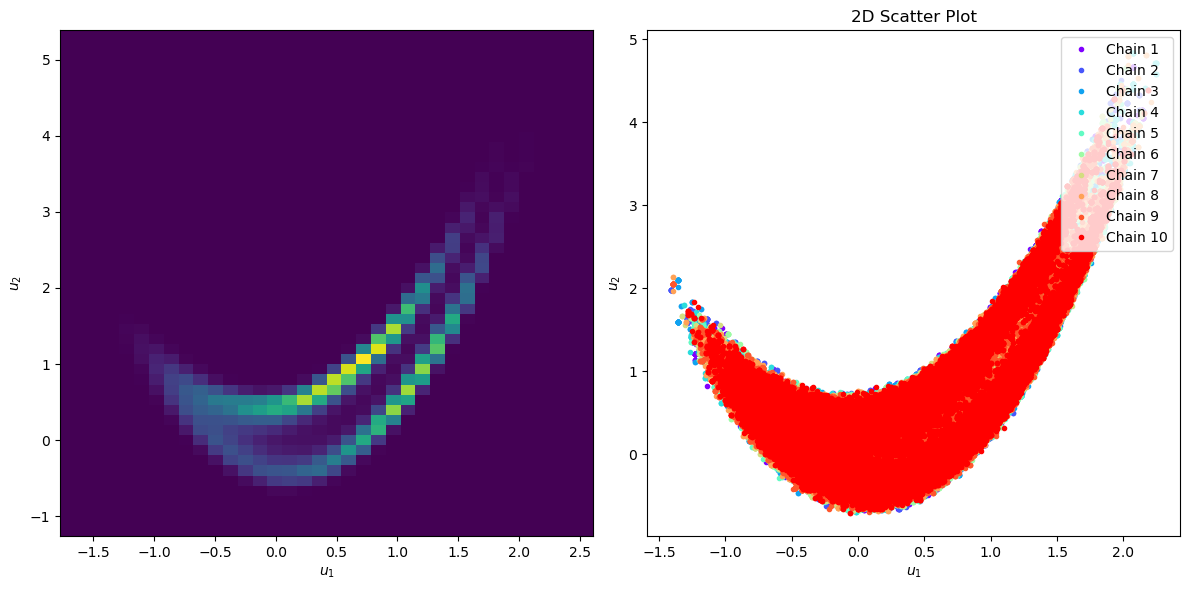

In [38]:
banana_DREAM.visualize(visuals=[banana_DREAM.samples])

**Quality of sampling method**

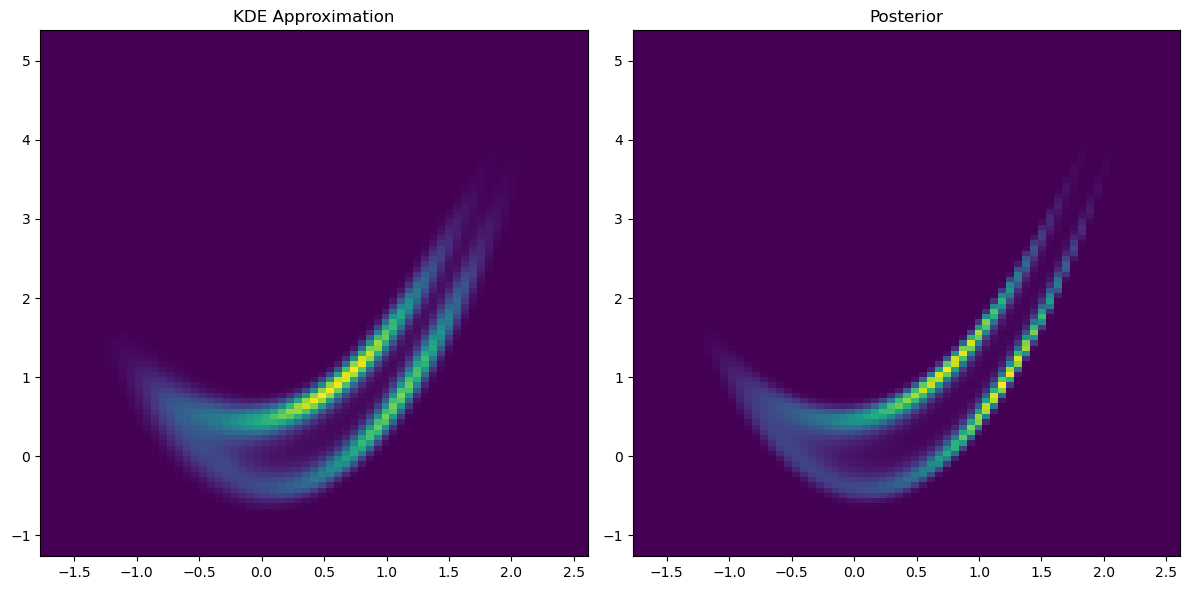

KL: 0.09635661910198491


In [39]:
print("KL:", banana_DREAM.sampling_quality(banana_DREAM.samples, visualise=True))

**Efficienty of the sampling method**

In [40]:
for chain in range(banana_DREAM.chains):
    for stage, acc_rate in enumerate(banana_DREAM.acc_rate[chain,:]):
        print(f"Acceptance rate for chain {chain+1}, stage {stage+1}: {(acc_rate * 100):.2f}%")
    print(f"Acceptance rate for chain {chain+1}: {((sum(banana_DREAM.acc[chain,:,1])/len(banana_DREAM.samples))*100):.2f}%")
    print("-----------------------------------------------------------------------------------------")
print(f"Acceptance rate: {((np.sum(banana_DREAM.acc[:,:,1])/(len(banana_DREAM.samples)*banana_DREAM.chains))*100):.2f}%")

Acceptance rate for chain 1, stage 1: 28.05%
Acceptance rate for chain 1, stage 2: 26.98%
Acceptance rate for chain 1, stage 3: 26.59%
Acceptance rate for chain 1: 61.43%
-----------------------------------------------------------------------------------------
Acceptance rate for chain 2, stage 1: 28.07%
Acceptance rate for chain 2, stage 2: 27.34%
Acceptance rate for chain 2, stage 3: 26.53%
Acceptance rate for chain 2: 61.60%
-----------------------------------------------------------------------------------------
Acceptance rate for chain 3, stage 1: 28.12%
Acceptance rate for chain 3, stage 2: 27.30%
Acceptance rate for chain 3, stage 3: 26.33%
Acceptance rate for chain 3: 61.50%
-----------------------------------------------------------------------------------------
Acceptance rate for chain 4, stage 1: 27.72%
Acceptance rate for chain 4, stage 2: 27.22%
Acceptance rate for chain 4, stage 3: 26.51%
Acceptance rate for chain 4: 61.34%
----------------------------------------------

In [41]:
print("nCR", banana_DREAM.nCR)
print("p_m", banana_DREAM.p_m)
print("L_m", banana_DREAM.L_m)
print("Delta_m", banana_DREAM.Delta_m)

print("R_hat", banana_DREAM.R_hat)
print("outlier_resets", banana_DREAM.outlier_resets)

nCR 3
p_m [0.20641682 0.58077551 0.21280768]
L_m [ 610295. 1450208.  622794.]
Delta_m [1.50196503e+08 5.87313392e+08 3.34939535e+10]
R_hat [1.00058386 1.00042826]
outlier_resets 0


### **Wave distribution (dim=2)**

**Parametrs**

In [42]:
chains = None
scale_factor = None
burnin = 0.2
nCR = 3
max_pairs = 3
eps = 1e-5
num_stages = 3
outlier_detection = True

wave_DREAM = DREAM(distribution=wave, chains=chains, scale_factor=scale_factor, burnin=burnin, nCR=nCR, max_pairs=max_pairs, eps=eps, num_stages=num_stages, outlier_detection=outlier_detection)

**Sampling**

In [43]:
initial = None
N = 100000

wave_DREAM.sample(initial=initial, N=N)

**Visualization of obtained samples**

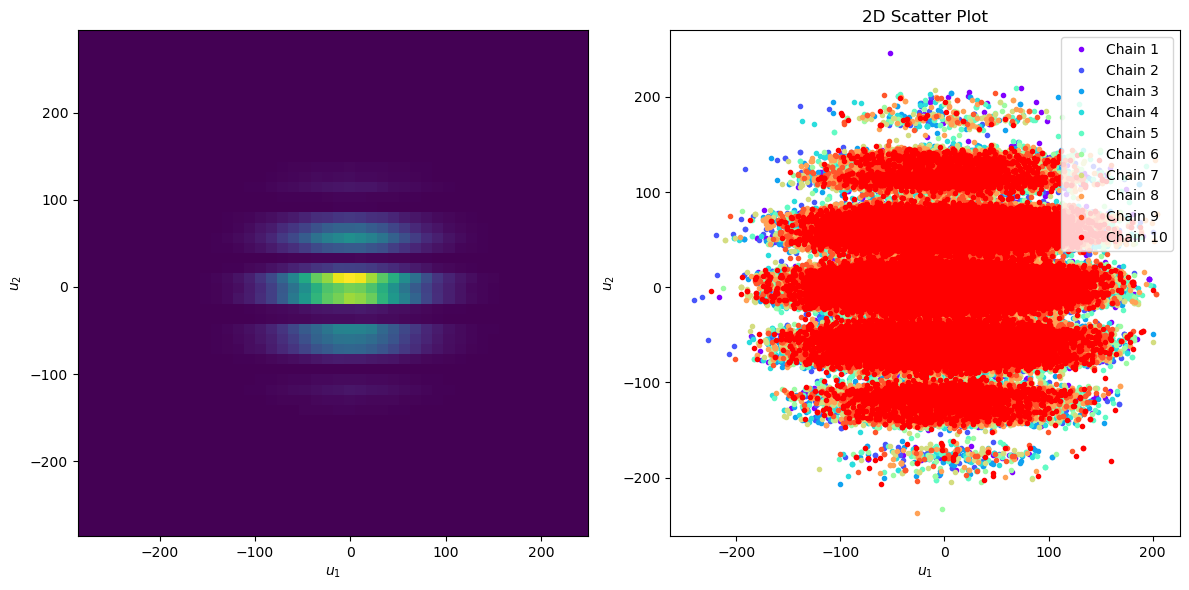

In [44]:
wave_DREAM.visualize(visuals=[wave_DREAM.samples])

**Quality of sampling method**

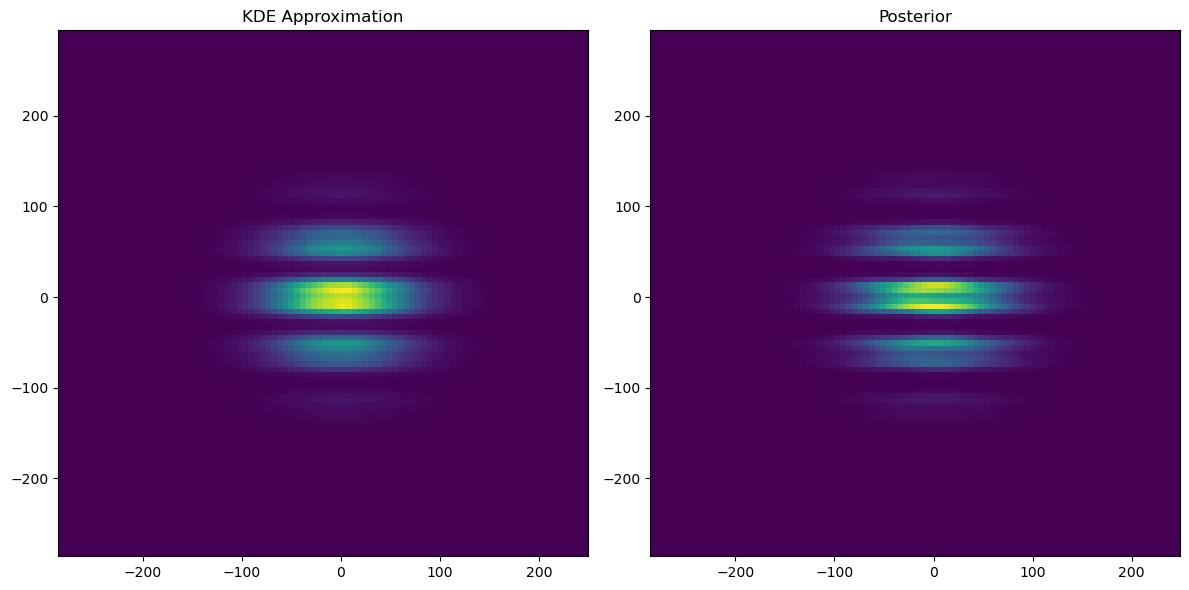

KL: 0.03648093981677003


In [45]:
print("KL:", wave_DREAM.sampling_quality(wave_DREAM.samples, visualise=True))

**Efficienty of the sampling method**

In [46]:
for chain in range(wave_DREAM.chains):
    for stage, acc_rate in enumerate(wave_DREAM.acc_rate[chain,:]):
        print(f"Acceptance rate for chain {chain+1}, stage {stage+1}: {(acc_rate * 100):.2f}%")
    print(f"Acceptance rate for chain {chain+1}: {((sum(wave_DREAM.acc[chain,:,1])/len(wave_DREAM.samples))*100):.2f}%")
    print("-----------------------------------------------------------------------------------------")
print(f"Acceptance rate: {((np.sum(wave_DREAM.acc[:,:,1])/(len(wave_DREAM.samples)*wave_DREAM.chains))*100):.2f}%")

Acceptance rate for chain 1, stage 1: 27.31%
Acceptance rate for chain 1, stage 2: 24.19%
Acceptance rate for chain 1, stage 3: 22.18%
Acceptance rate for chain 1: 57.12%
-----------------------------------------------------------------------------------------
Acceptance rate for chain 2, stage 1: 27.04%
Acceptance rate for chain 2, stage 2: 24.06%
Acceptance rate for chain 2, stage 3: 21.67%
Acceptance rate for chain 2: 56.60%
-----------------------------------------------------------------------------------------
Acceptance rate for chain 3, stage 1: 27.28%
Acceptance rate for chain 3, stage 2: 24.16%
Acceptance rate for chain 3, stage 3: 21.76%
Acceptance rate for chain 3: 56.85%
-----------------------------------------------------------------------------------------
Acceptance rate for chain 4, stage 1: 27.42%
Acceptance rate for chain 4, stage 2: 24.43%
Acceptance rate for chain 4, stage 3: 21.74%
Acceptance rate for chain 4: 57.07%
----------------------------------------------

In [47]:
print("nCR", wave_DREAM.nCR)
print("p_m", wave_DREAM.p_m)
print("L_m", wave_DREAM.L_m)
print("Delta_m", wave_DREAM.Delta_m)

print("R_hat", wave_DREAM.R_hat)
print("outlier_resets", wave_DREAM.outlier_resets)

nCR 3
p_m [0.01241308 0.07944414 0.90814279]
L_m [ 152658.  305943. 2193432.]
Delta_m [3.04425371e+07 1.10699190e+09 1.41392966e+11]
R_hat [1.00006243 1.00008195]
outlier_resets 0


In [48]:
wave_DREAM.samples.shape

(100000, 10, 2)

**Chain movement**

In [49]:
# Example usage (if part of a class)
#wave.animate_chain_movement(wave_DREAM.samples[:500, 0, :])

# NOTES

- remake visualize function --- (done)
    - split into subfunctions --- (done)
    - fix smaller issues --- (done)
    - easy to call --- (done)
    - adapt for Sampling algorithm classes --- (done)
- remake sampling algorithms into classes --- (done)
    - remake MH --- (done)
    - remake AM --- (done)
        - fix recursive formula in AM --- (done)
    - reamke DRAM --- (done)
        - add i-th stage proposal for DRAM --- (done)
        - fix acceptance_probability --- (done)
    - remake DREAM --- (done)
        - fix outlier detection --- (done)
        - add improve CR distribution --- (done)
        - add i-th stage proposal --- (done)
        - add initial population from prior --- (done)
        - Gelman-Rubin metric --- (done)
    - rework acc_rate --- (done)
- fix animate function --- (done)
- update function descriptions --- (done)
- remake posterior into log posterior --- (done)
    - allow both posterior and log_posterior --- (done)
    - auto create of likelihood and prior and combined posterior --- (done)
        - gaussian mulitimodal multinormal prior --- (done)
    - rework acceptance prob in all sampling algorithms --- (done)
-----------------------------------------------------------------------------------------------

- write theory for sampling algorithms --- (working)
    - MH
    - AM
    - DRAM
    - DREAM
- create high dimension distribution (multi-normal prolly)
- sampling_quality
    - create for N dimensions --- (done)
    - fix grid for sampling quality
    - add functionality for high dimension
        - monte carlo integration for only Gaussian distribution (to draw samples from without MCMC algorithm for comparison using KL divergence)
- create easy to use benchmark for each and all sampling algorithms
    - add ESS metric
    - monitor acc_rate for all stages in DR
    - add count for function evaluation and key parts of the algorithm
